In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import string 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('Suicide_Detection.csv')
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [6]:
df.describe()

,text,class
count,232074,232074
unique,232074,2
top,Ex Wife Threatening SuicideRecently I left my ...,suicide
freq,1,116037


In [7]:
# check for missing values
df.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
df.rename(columns = {'class':'label'}, inplace = True)

In [9]:
df['label'] = df['label'].replace({'suicide': 1, 'non-suicide': 0})
df

,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   label   232074 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


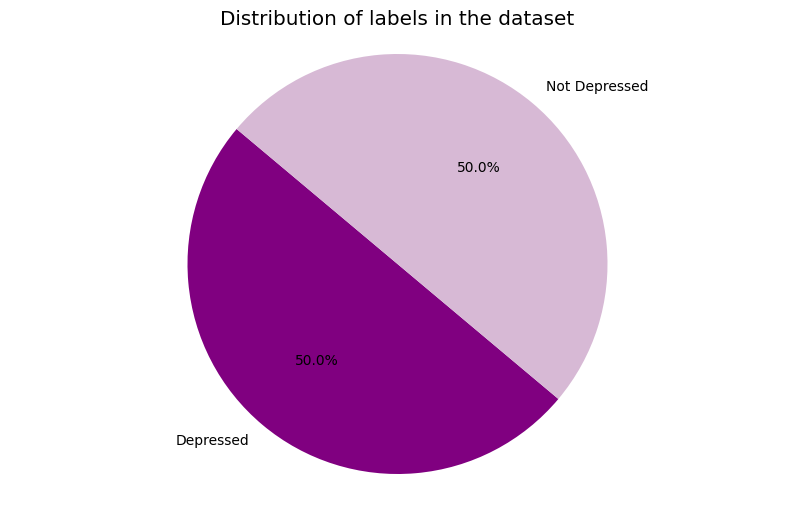

In [10]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a dictionary to map numeric labels to strings
label_dict = {0: 'Not Depressed', 1: 'Depressed'}

# Replace the numeric labels with strings
label_counts.index = label_counts.index.map(label_dict)

# Specify your colors in the same order as your labels
colors = ['#800080', '#d7b9d5']  # dark purple, light purple

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of labels in the dataset')
plt.show()

In [14]:
# Initialize a PorterStemmer for stemming words
ps = PorterStemmer()

In [17]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove all special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    text = re.sub(r'\d', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
     # Remove Emojis
    text = re.sub(u'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251]+', '', text)
    
    # Split text into words (tokenization)
    text = text.split()

    # Remove stopwords and perform stemming
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    
    # Join words to get the text back and return it
    return ' '.join(text)

In [18]:
# Apply the cleaning function to the 'text' column in your DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)
df

,text,label,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,1,ex wife threaten suiciderec left wife good che...
1,Am I weird I don't get affected by compliments...,0,weird get affect compliment come someon know i...
2,Finally 2020 is almost over... So I can never ...,0,final almost never hear bad year ever swear fu...
3,i need helpjust help me im crying so hard,1,need helpjust help im cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",1,losthello name adam struggl year afraid past y...
...,...,...,...
232069,If you don't like rock then your not going to ...,0,like rock go get anyth go
232070,You how you can tell i have so many friends an...,0,tell mani friend lone everyth depriv pre bough...
232071,pee probably tastes like salty tea😏💦‼️ can som...,0,pee probabl tast like salti tea someon drank p...
232072,The usual stuff you find hereI'm not posting t...,1,usual stuff find herei post sympathi piti know...


In [19]:
import spacy

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

def process_text(text):
    # Parse the text with SpaCy. This runs the entire pipeline.
    doc = nlp(text)
    
    # 'doc' now contains a parsed version of text. We can use it to do anything we want!
    # For example, this will print out all the named entities that were detected:

    # Lemmatization
    lemma_words = [token.lemma_ for token in doc]

    # Join lemmatized tokens back into a single string
    text = ' '.join(lemma_words)

    return text

In [20]:
df['new_cleaned_text'] = df['cleaned_text'].apply(process_text)
df

,text,label,cleaned_text,new_cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,1,ex wife threaten suiciderec left wife good che...,ex wife threaten suiciderec leave wife good ch...
1,Am I weird I don't get affected by compliments...,0,weird get affect compliment come someon know i...,weird get affect compliment come someon know i...
2,Finally 2020 is almost over... So I can never ...,0,final almost never hear bad year ever swear fu...,final almost never hear bad year ever swear fu...
3,i need helpjust help me im crying so hard,1,need helpjust help im cri hard,need helpjust help I m cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",1,losthello name adam struggl year afraid past y...,losthello name adam struggl year afraid past y...
...,...,...,...,...
232069,If you don't like rock then your not going to ...,0,like rock go get anyth go,like rock go get anyth go
232070,You how you can tell i have so many friends an...,0,tell mani friend lone everyth depriv pre bough...,tell mani friend lone everyth depriv pre buy l...
232071,pee probably tastes like salty tea😏💦‼️ can som...,0,pee probabl tast like salti tea someon drank p...,pee probabl tast like salti tea someon drank p...
232072,The usual stuff you find hereI'm not posting t...,1,usual stuff find herei post sympathi piti know...,usual stuff find herei post sympathi piti know...


In [22]:
import joblib

# Set a seed for reproducibility
np.random.seed(42)

try:
    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)

    # Fit and transform the cleaned text data
    tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

    # Save the vectorizer to a pickle file for future use
    joblib.dump(vectorizer, 'vectorizer2.pkl')

except Exception as e:
    print(f"An error occurred during vectorization: {e}")

# The result is a sparse matrix where each row corresponds to a document (in this case a tweet)
# and each column corresponds to a word in the vocabulary. The entries of the matrix are the
# TF-IDF scores of each word in each document.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

In [24]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

In [25]:
# Create a SVM classifier
svm_classifier = svm.SVC(kernel='linear')

In [26]:
# Train the model on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
# Use the trained model to make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [28]:
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)

In [29]:
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9348486480663578


In [30]:
# Save the trained model for future use
joblib.dump(svm_classifier, 'svm_classifier2.pkl')

['svm_classifier2.pkl']

In [31]:
def predict_depression(input_text):
    # Load the vectorizer and model from disk
    vectorizer = joblib.load('vectorizer2.pkl')
    svm_model = joblib.load('svm_classifier2.pkl')

    # Preprocess the text
    input_text = clean_text(input_text)

    # Convert the text to a TF-IDF matrix
    tfidf_matrix = vectorizer.transform([input_text])

    # Make a prediction
    prediction = svm_model.predict(tfidf_matrix)

    # Interpret the prediction
    if prediction[0] == 0:
        return "The text is not depressive"
    else:
        return "The text is depressive"


In [39]:
# Test the function
test_text = "i hate my life"
print(predict_depression(test_text))

The text is depressive


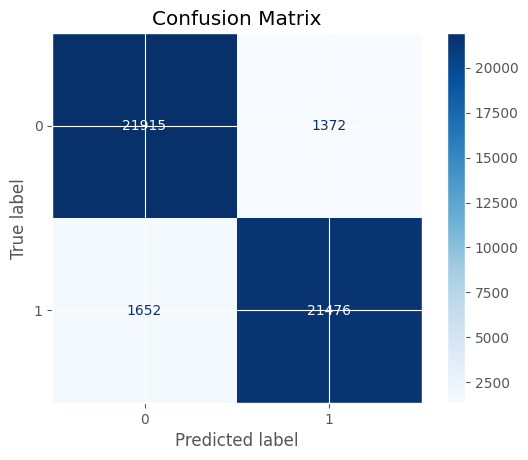

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Use ConfusionMatrixDisplay to plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


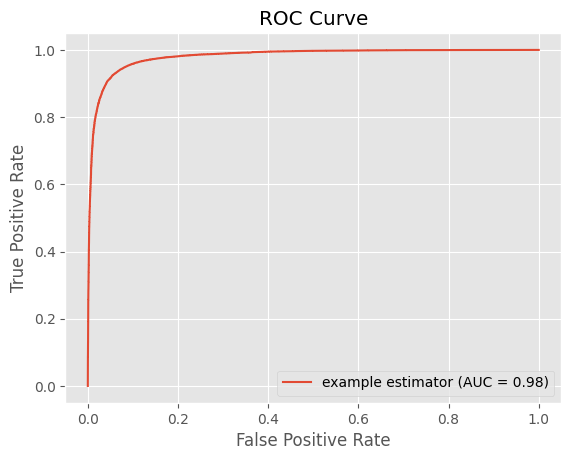

In [42]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, svm_classifier.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Use RocCurveDisplay to plot
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
roc_display.plot()
plt.title('ROC Curve')
plt.show()
